In [457]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [458]:
train=pd.read_csv('Titanic.csv')

In [459]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [460]:
train.shape

(891, 12)

In [461]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [462]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [463]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked =True, figsize=(10,5))

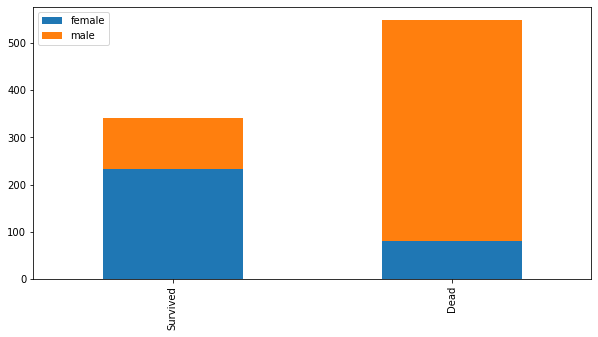

In [464]:
bar_chart('Sex')

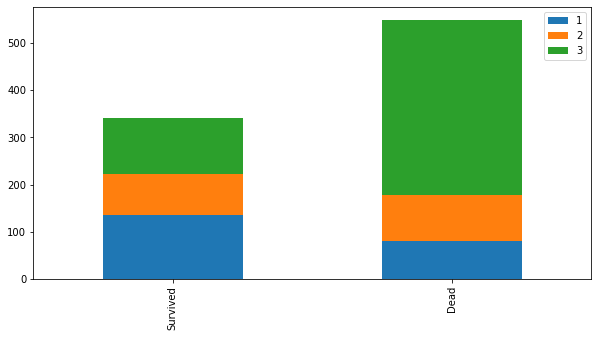

In [465]:
bar_chart('Pclass')

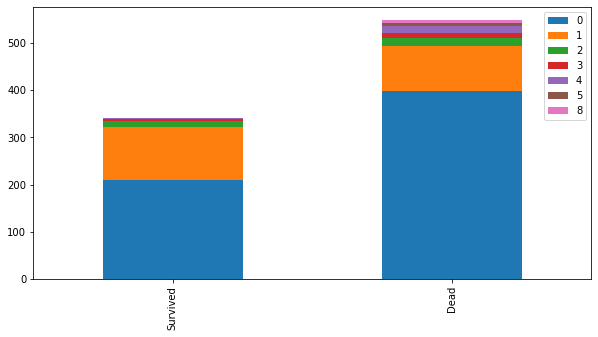

In [466]:
bar_chart('SibSp')

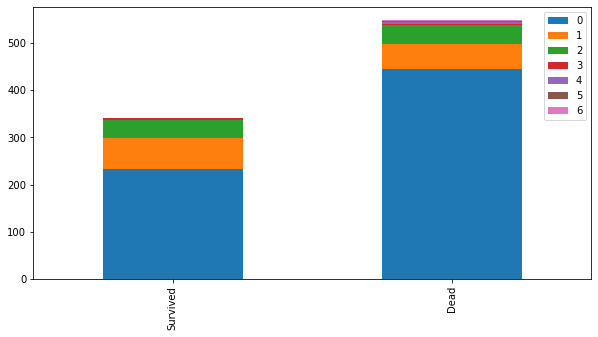

In [467]:
bar_chart('Parch')

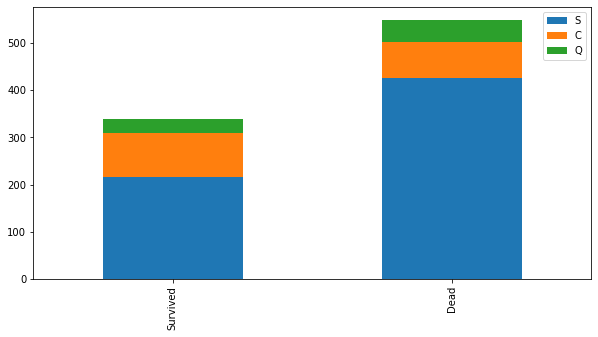

In [468]:
bar_chart('Embarked')

In [469]:
train_data =[train]
for dataset in train_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand =False)

In [470]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Lady          1
Capt          1
Sir           1
Don           1
Ms            1
Mme           1
Countess      1
Name: Title, dtype: int64

In [471]:
title_mapping ={'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':3,'Rev':3,'Col':3,'Major':3,'Mlle':3,'Jonkheer':3,'Lady':3,'Capt':3,'Sir':3,'Don':3,'Ms':3,'Mme':3,'Countess':3}

for dataset in train_data:
    dataset['Title']= dataset['Title'].map(title_mapping)

In [472]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


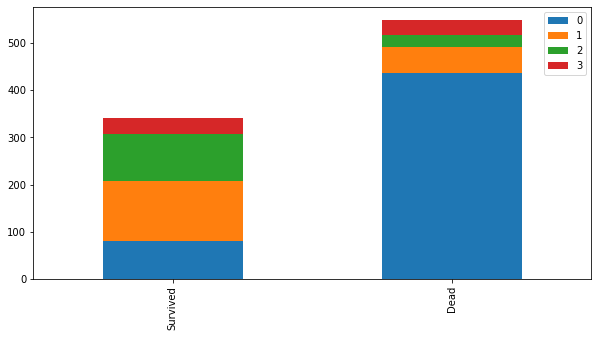

In [473]:
bar_chart('Title')

In [474]:
train.drop('Name',axis=1,inplace=True)

In [475]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [476]:
sex_mapping ={'male':0,'female':1}
for dataset in train_data:
    dataset['Sex']= dataset['Sex'].map(sex_mapping)

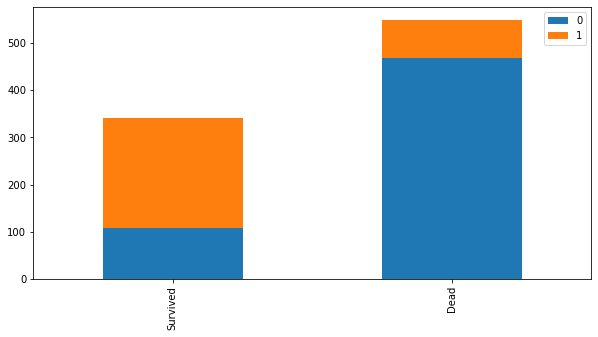

In [477]:
bar_chart('Sex')

In [478]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)

In [479]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

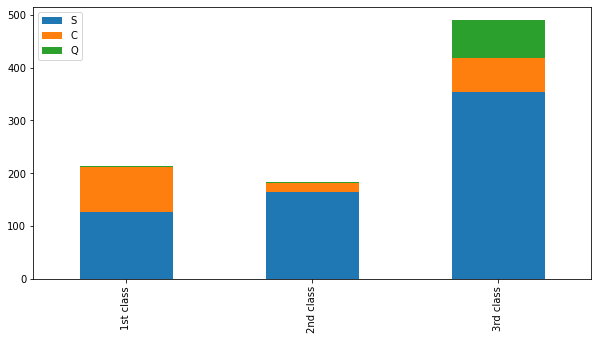

In [480]:
Pclass1 =train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 =train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 =train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index =['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))



In [481]:
for dataset in train_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [482]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [483]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0


In [484]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)

In [485]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
F2             3
F33            3
              ..
A32            1
D28            1
E68            1
A5             1
A20            1
Name: Cabin, Length: 147, dtype: int64

In [486]:
for dataset in train_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

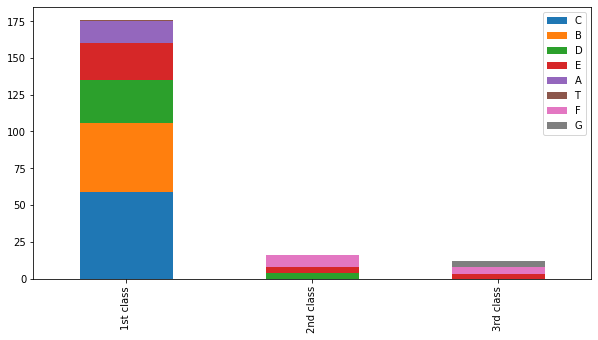

In [487]:
Pclass1=train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2=train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3=train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [488]:
cabin_mapping = {'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'H':2.8}
for dataset in train_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [489]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [490]:
train['FamilySize']= train['SibSp']+train['Parch']+1

In [491]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,2
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0.8,1,2,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,1
3,4,1,1,1,35.0,1,0,113803,53.1000,0.8,0,2,2
4,5,0,3,0,35.0,0,0,373450,8.0500,2.0,0,0,1
5,6,0,3,0,30.0,0,0,330877,8.4583,2.0,2,0,1
6,7,0,1,0,54.0,0,0,17463,51.8625,1.6,0,0,1
7,8,0,3,0,2.0,3,1,349909,21.0750,2.0,0,3,5
8,9,1,3,1,27.0,0,2,347742,11.1333,2.0,0,2,3
9,10,1,2,1,14.0,1,0,237736,30.0708,1.8,1,2,2


In [492]:
features_drop =['Ticket','SibSp','Parch']
train =train.drop(features_drop,axis=1)
train =train.drop(['PassengerId'],axis=1)

In [493]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,22.0,7.2500,2.0,0,0,2
1,1,1,1,38.0,71.2833,0.8,1,2,2
2,1,3,1,26.0,7.9250,2.0,0,1,1
3,1,1,1,35.0,53.1000,0.8,0,2,2
4,0,3,0,35.0,8.0500,2.0,0,0,1


In [494]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Cabin         0
Embarked      0
Title         0
FamilySize    0
dtype: int64

In [495]:
train.shape

(891, 9)

In [496]:
x=train.iloc[:,1:10]
x.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,22.0,7.2500,2.0,0,0,2
1,1,1,38.0,71.2833,0.8,1,2,2
2,3,1,26.0,7.9250,2.0,0,1,1
3,1,1,35.0,53.1000,0.8,0,2,2
4,3,0,35.0,8.0500,2.0,0,0,1


In [497]:
y=train.iloc[:,:1]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [498]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [499]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=49)

In [500]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 8)
(712, 1)
(179, 8)
(179, 1)


In [501]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy_score:',accuracy_score(y_test,preddtc))
print('Confusion_matrix:',confusion_matrix(y_test,preddtc))
print('Classification_report:',classification_report(y_test,preddtc))
    

Accuracy_score: 0.8491620111731844
Confusion_matrix: [[102  12]
 [ 15  50]]
Classification_report:               precision    recall  f1-score   support

           0       0.87      0.89      0.88       114
           1       0.81      0.77      0.79        65

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179

